# Interleaved Slices Issue

Illustrates current bug when 2 different structures have interleaved slices.


In [1]:
import logging

# Local functions and classes
from types_and_classes import *
from utilities import *
from debug_tools import *
from structure_set import *
from relations import *

### Global Settings

In [2]:
PRECISION = 2

In [3]:
%matplotlib inline

## ERROR: When structures have interleaved slices interpolation does not work.


### Just Body structure (ROI 0)  *For Reference*

In [ ]:
def irregular_slices_reference():
    '''Just Body structure (ROI 0)'''
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=4,
                                  spacing=slice_spacing)
    # combine the contours
    slice_data = body
    return slice_data

slice_data = irregular_slices_reference()
logging.getLogger('structure_set').setLevel(logging.DEBUG)
logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
logging.getLogger('structure_set').setLevel(logging.INFO)
logging.getLogger('contour_graph').setLevel(logging.INFO)

DEBUG:structure_set:Building structure for ROI: 0
DEBUG:contour_graph:Building contour graph for ROI: 0
DEBUG:contour_graph:Found 2 boundary contours to interpolate.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -2.0
DEBUG:contour_graph:Using gap: 1.00 to create interpolated slice: -3.00
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 2.0
DEBUG:contour_graph:Using gap: -1.00 to create interpolated slice:  3.00
DEBUG:structure_set:Slice sequence after ROI 0:
           ThisSlice  NextSlice  PreviousSlice  Original
ThisSlice                                               
-2.5            -2.5       -2.0            NaN     False
-2.0            -2.0       -1.0            NaN      True
-1.0            -1.0        0.0           -2.0      True
 0.0             0.0        1.0           -1.0      True
 1.0             1.0        2.0            0.0      True
 2.0             2.0        NaN            1.0      True
 2.5             2.5      

#### ERROR gap should be 0.5 not 1.0
- distance between slices should be divided by 2

- DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -2.0
- DEBUG:contour_graph:`Using gap: 1.00 to create interpolated slice: -3.00`
<br><br>
- DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 2.0
- DEBUG:contour_graph:`Using gap: -1.00 to create interpolated slice:  3.00`

> **The above gap is not actually being used.**

### Regular slices with hole (all on integer slices) *For Reference*
- Body structure (ROI 0) on integer slices
- Primary cylinder and Right hole (ROI 1) on integer slices

**Boundary contours correctly identified**


In [10]:
def regular_slices_cylindrical_hole():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=6,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=2,
                                              spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=2,
                                        offset_x=2.5, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + right_hole
    return slice_data
slice_data = regular_slices_cylindrical_hole()
logging.getLogger('structure_set').setLevel(logging.DEBUG)
logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
logging.getLogger('structure_set').setLevel(logging.INFO)
logging.getLogger('contour_graph').setLevel(logging.INFO)

DEBUG:structure_set:Building structure for ROI: 0
DEBUG:contour_graph:Building contour graph for ROI: 0
DEBUG:contour_graph:Found 2 boundary contours to interpolate.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -3.0
DEBUG:contour_graph:Using gap: 1.00 to create interpolated slice: -4.00
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 3.0
DEBUG:contour_graph:Using gap: -1.00 to create interpolated slice:  4.00
DEBUG:structure_set:Slice sequence after ROI 0:
           ThisSlice  NextSlice  PreviousSlice  Original
ThisSlice                                               
-3.5            -3.5       -3.0            NaN     False
-3.0            -3.0       -2.0            NaN      True
-2.0            -2.0       -1.0           -3.0      True
-1.0            -1.0        0.0           -2.0      True
 0.0             0.0        1.0           -1.0      True
 1.0             1.0        2.0            0.0      True
 2.0             2.0      

### Interleaved slices with hole
- Body structure (ROI 0) on integer slices
- Primary cylinder and Right hole (ROI 1) on half integer slices

**Boundary contours are not correctly identified**
> - **4 boundary contours found for ROI 0.**
> - **0 boundary contours found for ROI 1.**



In [13]:
def irregular_slices_cylindrical_hole():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=6,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=3,
                                              spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=3,
                                        offset_x=2.5, spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + right_hole
    return slice_data
slice_data = irregular_slices_cylindrical_hole()
logging.getLogger('structure_set').setLevel(logging.DEBUG)
logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
logging.getLogger('structure_set').setLevel(logging.INFO)
logging.getLogger('contour_graph').setLevel(logging.INFO)

DEBUG:structure_set:Building structure for ROI: 0
DEBUG:contour_graph:Building contour graph for ROI: 0
DEBUG:contour_graph:Found 4 boundary contours to interpolate.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -3.0
DEBUG:contour_graph:Using gap: 1.00 to create interpolated slice: -4.00
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -2.0
DEBUG:contour_graph:Using slice: -1.50 for interpolation.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 3.0
DEBUG:contour_graph:Using gap: -1.00 to create interpolated slice:  4.00
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 2.0
DEBUG:contour_graph:Using slice:  1.50 for interpolation.
DEBUG:structure_set:Slice sequence after ROI 0:
           ThisSlice  NextSlice  PreviousSlice  Original
ThisSlice                                               
-3.50          -3.50       -3.0            NaN     False
-3.00          -3.00       -2.0     

#### ERROR: No edges for ROI 1

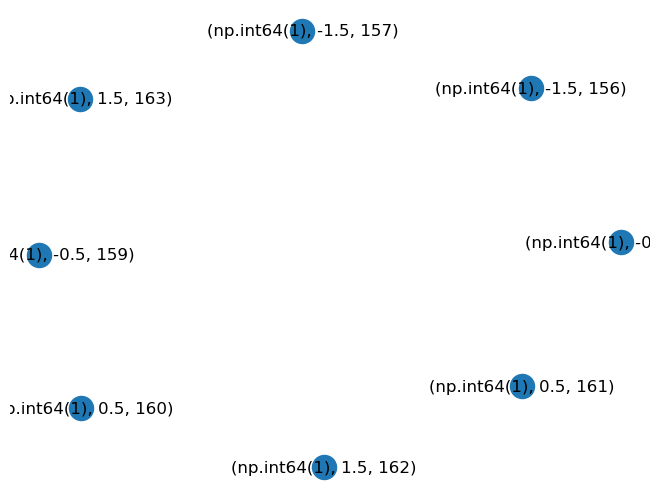

In [15]:
contour_graph = structures.structures[1].contour_graph
nx.draw(
    contour_graph,
    with_labels=True,
   # pos=nx.arf_layout(contour_graph)
    )
plt.show()

#### ERROR: Disconnected middle slices and ends for ROI 0

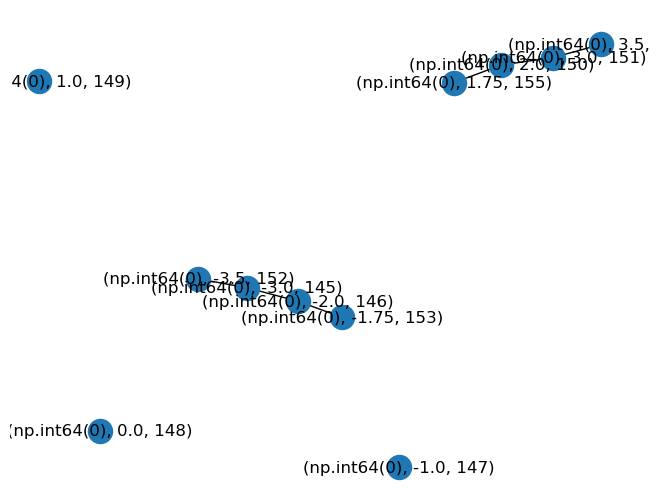

In [ ]:
contour_graph = structures.structures[0].contour_graph
nx.draw(
    contour_graph,
    with_labels=True,
   # pos=nx.arf_layout(contour_graph)
    )
plt.show()

### Interleaved slices with 3 structures
- Body structure (ROI 0) on integer slices
- Primary cylinder and Right hole (ROI 1) on half integer slices
- confines_cylinder (ROI 2) on integer slices

**Boundary contours are not correctly identified**
> - **4 boundary contours found for ROI 0.**
> - **0 boundary contours found for ROI 1.**
> - **0 boundary contours found for ROI 2.**



In [17]:
def irregular_slices_3_structures():
    slice_spacing = 1
    # Body structure defines slices in use
    body = make_vertical_cylinder(roi_num=0, radius=12, length=6,
                                  spacing=slice_spacing)
    # Centred cylinder with two embedded cylinders
    primary_cylinder = make_vertical_cylinder(roi_num=1, radius=5, length=3,
                                              spacing=slice_spacing)
    right_hole = make_vertical_cylinder(roi_num=1, radius=2, length=3,
                                        offset_x=2.5, spacing=slice_spacing)
    # cylinder with interior borders
    confines_cylinder = make_vertical_cylinder(roi_num=2, radius=1,
                                                length=2, offset_x=2.5,
                                                spacing=slice_spacing)
    # combine the contours
    slice_data = body + primary_cylinder + right_hole + confines_cylinder
    return slice_data
slice_data = irregular_slices_3_structures()
logging.getLogger('structure_set').setLevel(logging.DEBUG)
logging.getLogger('contour_graph').setLevel(logging.DEBUG)
structures = StructureSet(slice_data)
logging.getLogger('structure_set').setLevel(logging.INFO)
logging.getLogger('contour_graph').setLevel(logging.INFO)

DEBUG:structure_set:Building structure for ROI: 0
DEBUG:contour_graph:Building contour graph for ROI: 0
DEBUG:contour_graph:Found 4 boundary contours to interpolate.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 3.0
DEBUG:contour_graph:Using gap: -1.00 to create interpolated slice:  4.00
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -2.0
DEBUG:contour_graph:Using slice: -1.50 for interpolation.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: 2.0
DEBUG:contour_graph:Using slice:  1.50 for interpolation.
DEBUG:contour_graph:Generating interpolated contour for ROI: 0 from slice: -3.0
DEBUG:contour_graph:Using gap: 1.00 to create interpolated slice: -4.00
DEBUG:structure_set:Slice sequence after ROI 0:
           ThisSlice  NextSlice  PreviousSlice  Original
ThisSlice                                               
-3.50          -3.50       -3.0            NaN     False
-3.00          -3.00       -2.0     

In [ ]:
selected_columns = ['SliceIndex', 'HoleType', 'Interpolated',
                    'RegionIndex']

In [26]:
print(structures.structures[0].contour_lookup[selected_columns])


    SliceIndex HoleType  Interpolated RegionIndex
10       -3.50     None          True          0A
0        -3.00     None         False          0A
1        -2.00     None         False          0A
8        -1.75     None          True          0A
2        -1.00     None         False          0B
3         0.00     None         False          0C
4         1.00     None         False          0D
9         1.75     None          True          0E
5         2.00     None         False          0E
6         3.00     None         False          0E
7         3.50     None          True          0E


In [27]:
print(structures.structures[1].contour_lookup[selected_columns])


   SliceIndex HoleType  Interpolated RegionIndex
0        -1.5     None         False          1A
1        -1.5  Unknown         False          1B
2        -0.5     None         False          1C
3        -0.5  Unknown         False          1D
4         0.5     None         False          1E
5         0.5  Unknown         False          1F
6         1.5     None         False          1G
7         1.5  Unknown         False          1H


In [28]:
print(structures.structures[2].contour_lookup[selected_columns])


   SliceIndex HoleType  Interpolated RegionIndex
0        -1.0     None         False          2A
1         0.0     None         False          2B
2         1.0     None         False          2C
